# <center> Why Python?</center>
 

We too can find biased surveys. The index calculation comes down to counting hits for the search query

https://www.tiobe.com/tiobe-index/

<img src="tiobe1.png">

<img src="tiobe2.png">

### Let's see who else codes in Python....

<img src="koren1.png">

The list of libraries goes on if you don't believe us, check for yourself...

https://github.com/korenmiklos/Technological-Diversification-AER/tree/master/quantitative_assessment

<img src="koren2.png">

Those were some fine Python and command line skills. 

But let's see who else codes in Python....


<img src="fleck.png">

### We hope we convinced you. If not, we also have included a mini demo on what you can achieve with Python.

We're going to present how to create the spam filter in Python with few lines of code.
You can find the full notebook for this exercise on courses GitHub account.

https://github.com/ariedamuco/ML-for-NLP

https://github.com/ariedamuco/Python-Programming-and-Text-Analysis

We're going to use Standford ML repository for the Spam Collection data.

In [1]:
import pandas #R inspired library! Some flavor of R in Python
data = pandas.read_csv('SMSSpamCollection', sep='\t', names=["label", "message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Feature engineering in one line of code! (Usually you need to do more)

In [2]:
data['length'] = data['message'].apply(len)

### Quick visualization !!!

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

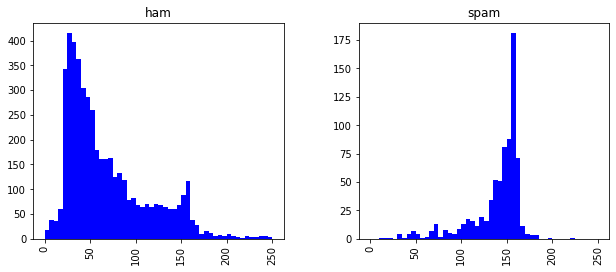

In [3]:
data.hist(column='length', by='label',
          color='blue', bins=50, figsize=(10,4), range=[0, 250])

In [4]:
data['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [5]:
long_message = data[data['length'] == 910]['message'].iloc[0]
long_message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### We need to do some data cleaning. Let's create a function. In Python functions are straightforward if you know the syntax. You create them as you'd speak in plain English. As easy as Stata syntax!!! (But Stata does not have functions! R does, but not intuitive.)

In [6]:
import re
def clean_corpus(text):
    text = re.sub(r'\W',' ', text)
    return text.lower()

In [7]:
clean_corpus(long_message)

'for me the love should start with attraction i should feel that i need her every time around me she should be the first thing which comes in my thoughts i would start the day and end it with her she should be there every time i dream love will be then when my every breath has her name my life should happen around her my life will be named to her i would cry for her will give all my happiness and take all her sorrows i will be ready to fight with anyone for her i will be in love when i will be doing the craziest things for her love will be when i don t have to proove anyone that my girl is the most beautiful lady on the whole planet i will always be singing praises for her love will be when i start up making chicken curry and end up makiing sambar life will be the most beautiful then will get every morning and thank god for the day because she is with me i would like to say a lot  will tell later  '

#### Now we're ready for text classification, we're going to feed our cleaned text to our algorithm. For that we would need to first import the `scikit-learn` library (a core advantage of Python), and do a train-test split.

In [8]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=1)
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
#create pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor = clean_corpus, stop_words='english')),  #integer counts
    ('classifier', MultinomialNB()),  #Multinomial Naive Bayes classifier
])

In [9]:
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

In [10]:
from sklearn.metrics import classification_report
print (classification_report(label_test,  predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       968
        spam       0.98      0.95      0.97       147

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, predictions)

array([[965,   3],
       [  7, 140]])

### Let's do some out of sample predictions!!!

In [12]:
print(pipeline.predict(["Do you want to build a snow man?"]))

['ham']


In [13]:
print(pipeline.predict(["Ok R-team, you win the debate!"]))

['ham']


In [14]:
print(pipeline.predict(["Urgent! Claim your Stata license for only $20000$!"]))

['spam']


In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = clean_corpus, stop_words='english')
X = vectorizer.fit_transform(data['message'])
clf.fit(X, data['label'])

LogisticRegression()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 50), feature_names[interesting_coefficients], rotation=60, ha="right")

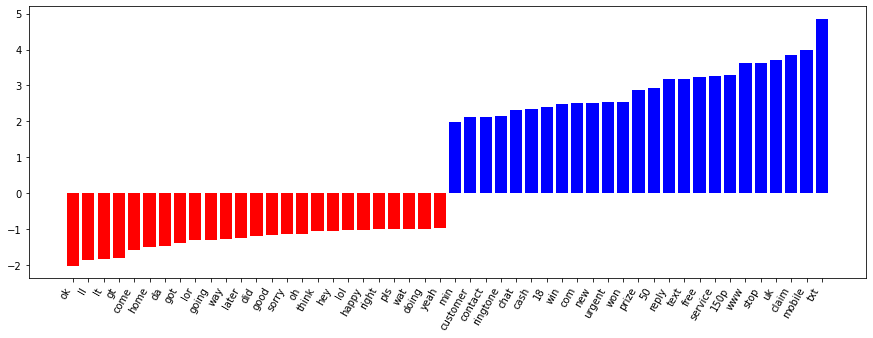

In [17]:
visualize_coefficients(clf, vectorizer.get_feature_names())    


We hope we convinced you! If we didn't, we hope we can convice you once you are at CEU and take these cutting edge courses we offer!

In [18]:
print(pipeline.predict(["Python Rocks!"]))

['ham']
